# Aufgaben Blatt 4 KI Machine Learning I



## Aufgabe 1 (Lineare Regression)

Bearbeiten Sie die Aufgabe https://github.com/oduerr/ki/blob/main/linear_regression/lr_gradient_descent.ipynb

Versuchen Sie den Code zu verstehen und machen die kleineren Aufgaben, die in dem notebook besprochen werden.

## Aufgabe 2 (Titanic)
In dieser Aufgabe nehmen Sie an der Titanic Challenge (https://www.kaggle.com/c/titanic) teil. Sie können die Aufgabe am eigenen PC lösen oder direkt in Kaggle lösen. Die Daten liegen auch auf Moodle. 

a) Lesen Sie die Trainingsdaten ein und teilen Sie sie in ein Validierungsdatenset (20%) und in ein eigentliches Trainigsdatenset (80%) auf. Finden Sie auf dem Validierungsdatensatz eine Regel für das Überleben alleine aufgrund der Klasse des Tickets (Pclass). Wenden Sie diese Regel auf die Validierungsdaten an. Wie gut ist die Genauigkeit (Anteil der korrekten Klassifikationen) auf den Validierungsdaten?  

In [23]:
# Hinweise zum Einlesen
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split

train_val = pd.read_csv('titanic/train.csv')
train, validate = train_test_split(train_val, test_size=0.2)

# Hinweise zum Erzeugen einer Tabelle
# pd.crosstab(...)

# Hinweise um die Accuracy zu berechnen
from sklearn.metrics import accuracy_score

In [24]:
#print(train.head())

trainSelected = train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False)
print(trainSelected)

def simplePredict(set):
    #print(set['Pclass'].tolist())
    classes = set['Pclass'].tolist()
    survived = []
    survivedExists = True
    try:
        for s in set['Survived'].tolist():
            if s == 1:
                survived.append(s)
    except BaseException:
        survivedExists = False

    person = set['PassengerId'].tolist()

    survivedPred = []
    for idx,pClass in enumerate(classes):
        if (pClass == 1):
            survivedPred.append(1) # person[idx])
        else:
            survivedPred.append(0)

    print("\n\nTotal: ", len(person))
    if survivedExists:
        print("survived: ", len(survived))
    print("Predicted: ", survivedPred.count(1))
    if survivedExists:
        print('Korrektheit (1 = 100%): ', survivedPred.count(1) / len(survived))

    return survivedPred

ex = simplePredict(train)
ex = simplePredict(validate)

        Survived
Pclass          
1       0.627119
2       0.465278
3       0.230179


Total:  712
survived:  268
Predicted:  177
Korrektheit (1 = 100%):  0.6604477611940298


Total:  179
survived:  74
Predicted:  39
Korrektheit (1 = 100%):  0.527027027027027


b) Wenden Sie die Regel aus a) auf die Testdaten an und laden Sie Ihre Lösung hoch. 

In [25]:
#############################################
# Hinweise zum rausschreiben
#pred_survived #Enhält die Predictions 0 für Tod 1 für Survived
test_data = pd.read_csv('titanic/test.csv')

pred_survived = simplePredict(test_data)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': pred_survived})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")



Total:  418
Predicted:  107
Your submission was successfully saved!


c) Logistische Regression mit Pclass

Trainieren Sie eine logistische Regression mit den Variablen 'Pclass'. Verwenden Sie die Klasse `sklearn.linear_model.LogisticRegression`. Berechnen Sie die Accuracy auf dem Validierungsset.

In [26]:
from sklearn.linear_model import LogisticRegression
import sklearn
import matplotlib.pyplot as plt

# print(train_val.dtypes)

train, validate = train_test_split(train_val, test_size=0.2)

model = LogisticRegression()
#model.add(sklearn.layers.Dense(20, activation='relu', input_shape=(10,)))

model.fit(np.asarray(train['Pclass']).reshape(-1, 1), train['Survived'])
# plt.plot(history)
# plt.show()
# model.evaluate(train['Pclass'], train['Survived'], verbose=2)

pred_survived = model.predict(np.asarray(train['Pclass']).reshape(-1, 1))
accuracy_score(np.asarray(train['Survived']).reshape(-1, 1), pred_survived)

0.6741573033707865

d) Coding / Feature engineering 

d.i) Missing Values:

Verwenden Sie nun weitere Features. Die Variable Age enthält Missing values, die Sie durch folgenden code ersetzen können (was passiert da?)

In [27]:
# Bei einem fehlenden Alter (NaN) wird der Median aller vorhandenen Alterszahlen berechnet (skips NULL values) und stattdessen eingesetzt
validate["Age"].fillna(train["Age"].median(skipna=True), inplace=True)
train["Age"].fillna(train["Age"].median(skipna=True), inplace=True)

# Logistische Regression mit Age
# model = LogisticRegression()
model.fit(np.asarray(train['Age']).reshape(-1, 1), train['Survived'])
pred_survived = model.predict(np.asarray(train['Age']).reshape(-1, 1))
accuracy_score(np.asarray(train['Survived']).reshape(-1, 1), pred_survived)

0.6109550561797753

d.ii) Kategorische Variable

Verwenden Sie die Funktion `pd.get_dummies` um die Variablen 'Pclass' and 'Sex' in numerische Werte umzuwandeln. Führen Sie nun eine logistische Regression durch.

In [28]:
# print(pd.get_dummies(validate['Pclass']))
# print(pd.get_dummies(validate['Sex']))

# for train values
pClassAsNum = pd.get_dummies(train['Pclass'])
sexAsNum = pd.get_dummies(train['Sex'])
train["Age"].fillna(train["Age"].median(skipna=True), inplace=True)

model = LogisticRegression()
toFit = pd.concat([pClassAsNum,sexAsNum, train["Age"]], axis=1)
model.fit(toFit, train['Survived'])

# for validate values
pClassAsNumVal = pd.get_dummies(validate['Pclass'])
sexAsNumVal = pd.get_dummies(validate['Sex'])
validate["Age"].fillna(validate["Age"].median(skipna=True), inplace=True)

validate_values = pd.concat([pClassAsNumVal,sexAsNumVal, validate["Age"]], axis=1)
# print(validate_values)

pred_survived = model.predict(validate_values)

accuracy_score(np.asarray(validate['Survived']).reshape(-1, 1), pred_survived)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.776536312849162

e) Weitere Klassifikatoren. Neben der logistischen Regression, gibt es weitere Klassifikatoren. Der Random-Forest ist ein recht stabiler Klassifikator, was wäre die Performance von diesem Klassifikator.

In [29]:
# Hinweise zur Lösung
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
#rf hat nun gleiches interface, wie die logistische Regression

# selbes Szenario wie aus d.ii) -> 0.81564245...

toFit = pd.concat([pClassAsNum, sexAsNum, train["Age"]], axis=1)
rf.fit(toFit, train['Survived'])

# for validate values
pClassAsNumVal = pd.get_dummies(validate['Pclass'])
sexAsNumVal = pd.get_dummies(validate['Sex'])
validate["Age"].fillna(validate["Age"].median(skipna=True), inplace=True)

validate_values = pd.concat([pClassAsNumVal,sexAsNumVal, validate["Age"]], axis=1)
# print(validate_values)

pred_survived = rf.predict(validate_values)

accuracy_score(np.asarray(validate['Survived']).reshape(-1, 1), pred_survived)



#rf.fit(np.asarray(train['Pclass']).reshape(-1, 1), train['Survived'])
#pred_survived = rf.predict(np.asarray(train['Pclass']).reshape(-1, 1))
#accuracy_score(np.asarray(train['Survived']).reshape(-1, 1), pred_survived)


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.8212290502793296

f) [optional] Versuchen Sie weitere Features zu erzeugen und laden den besten Klassifikator auf Kaggle hoch. 

## Aufgabe 3 Titanic mit Neuronalen Netzen 

Hinweis: Diese Aufgabe kann erst nach der dritten Vorlesung in ML gemacht werden.

Mit den gleichen Daten, wie in der Aufgabe 2 d. Erstellen Sie ein fully connected neural network und fitten es an die Ttrainingsdaten. Verwenden Sie mindestens zwei hidden Layer. Plotten Sie den Verlauf der Loss Kurve für die Trainings- und Validierungsdaten. Optional: Laden Sie Ihre beste Lösung auf Kaggle hoch. 

In [30]:
#Sie können von folgendem Code starten um das Netzwerk zu definieren, füllen Sie die ...
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense

# make Network
model = Sequential()
model.add(Dense(100, activation='sigmoid', batch_input_shape=(None, 6))) #We have 4 input features
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

opt = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=opt,
              metrics=['accuracy'])

# Read Testfiles
train_val = pd.read_csv('titanic/train.csv')
titanic_test_data = pd.read_csv('titanic/test.csv')

train_val["Age"].fillna(train_val["Age"].median(skipna=True), inplace=True)
test_data["Age"].fillna(train_val["Age"].median(skipna=True), inplace=True)

train, validate = train_test_split(train_val, test_size=0.2)

# train Data
pClassAsNum = pd.get_dummies(train['Pclass'])
sexAsNum = pd.get_dummies(train['Sex'])
train["Age"].fillna(train["Age"].median(skipna=True), inplace=True)

toFit = pd.concat([pClassAsNum, sexAsNum, train["Age"]], axis=1)
# print(toFit)
history = model.fit(toFit, train['Survived'], validation_split=0.2, epochs=100)

# validate Data
pClassAsNumValidate = pd.get_dummies(validate['Pclass'])
sexAsNumValidate = pd.get_dummies(validate['Sex'])
validate["Age"].fillna(validate["Age"].median(skipna=True), inplace=True)

toValidate = pd.concat([pClassAsNumValidate, sexAsNumValidate, validate["Age"]], axis=1)


# prediction Data
pClassAsNumTitanic = pd.get_dummies(titanic_test_data['Pclass'])
sexAsNumTitanic = pd.get_dummies(titanic_test_data['Sex'])
titanic_test_data["Age"].fillna(titanic_test_data["Age"].median(skipna=True), inplace=True)
titanicTestDataShort = pd.concat([pClassAsNumTitanic, sexAsNumTitanic, titanic_test_data["Age"]], axis=1)

# predict
model.evaluate(toValidate, validate["Survived"])
pred_survived = model.predict(np.asarray(titanicTestDataShort).astype(float))
for i in range(len(pred_survived)):
    if pred_survived[i] > 0.49:
        pred_survived[i] = 1
    else:
        pred_survived[i] = 0
# print(pred_survived)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': pred_survived.astype(int).flatten()})
# print(output)
output.to_csv('my_submission_v2.csv', index=False)
print("Your submission was successfully saved!")

model.summary()

Epoch 1/500
18/18 [==============================] - 1s 12ms/step - loss: 0.6723 - accuracy: 0.5923 - val_loss: 0.6274 - val_accuracy: 0.6993
Epoch 2/500
18/18 [==============================] - 0s 4ms/step - loss: 0.6686 - accuracy: 0.5923 - val_loss: 0.6253 - val_accuracy: 0.7203
Epoch 3/500
18/18 [==============================] - 0s 4ms/step - loss: 0.6675 - accuracy: 0.6098 - val_loss: 0.6190 - val_accuracy: 0.7203
Epoch 4/500
18/18 [==============================] - 0s 4ms/step - loss: 0.6599 - accuracy: 0.6134 - val_loss: 0.6158 - val_accuracy: 0.7133
Epoch 5/500
18/18 [==============================] - 0s 4ms/step - loss: 0.6555 - accuracy: 0.6116 - val_loss: 0.6093 - val_accuracy: 0.7063
Epoch 6/500
18/18 [==============================] - 0s 4ms/step - loss: 0.6488 - accuracy: 0.6134 - val_loss: 0.6069 - val_accuracy: 0.7063
Epoch 7/500
18/18 [==============================] - 0s 4ms/step - loss: 0.6420 - accuracy: 0.6221 - val_loss: 0.5883 - val_accuracy: 0.7063
Epoch 8/500


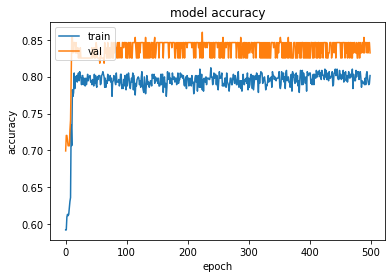

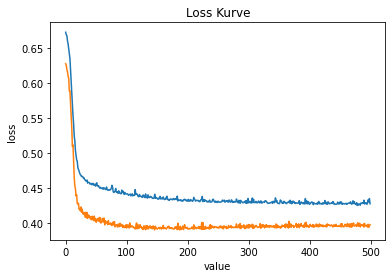

In [31]:
# plotten
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Kurve')
plt.ylabel('loss')
plt.xlabel('value')
#plt.legend(['train', 'val'], loc='upper left')
plt.show()